<a href="https://colab.research.google.com/github/KumarGaurav20/Spam-Emails/blob/main/TRAINING_NAIVE_BAYES_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TRAINING NAIVE BAYES CLASSIFIER

IMPORTS

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

CONSTANTS

In [72]:
TRAINING_DATA_FILE = '/content/gdrive/MyDrive/COLAB DATA/NAIVE BAYES CLASSIFIER DATA/train-data.txt'
TEST_DATA_FILE = '/content/gdrive/MyDrive/COLAB DATA/NAIVE BAYES CLASSIFIER DATA/test-data.txt'

TOKEN_SPAM_PROB_FILE = '/content/gdrive/MyDrive/COLAB DATA/prob-spam.txt'
TOKEN_HAM_PROB_FILE = '/content/gdrive/MyDrive/COLAB DATA/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = '/content/gdrive/MyDrive/COLAB DATA/prob-all-tokens.txt'



TEST_FEATURE_MATRIX = '/content/gdrive/MyDrive/COLAB DATA/test-features.txt'
TEST_TARGET_FILE = '/content/gdrive/MyDrive/COLAB DATA/test-target.txt'

VOCAB_SIZE = 2500

ACESSING DATA


In [4]:
sparse_train_data = np.loadtxt(TRAINING_DATA_FILE, delimiter=' ', dtype=int)
sparse_test_data = np.loadtxt(TEST_DATA_FILE, delimiter=' ', dtype=int)


In [5]:
sparse_train_data[0:10]

array([[ 0,  0,  1,  2],
       [ 0,  7,  1,  1],
       [ 0, 15,  1,  1],
       [ 0, 18,  1,  1],
       [ 0, 24,  1,  1],
       [ 0, 29,  1,  1],
       [ 0, 52,  1,  1],
       [ 0, 60,  1,  1],
       [ 0, 64,  1,  1],
       [ 0, 65,  1,  1]])

In [6]:
sparse_test_data[0:10]

array([[   8,    7,    1,    1],
       [   8,    8,    1,    1],
       [   8,   12,    1,    1],
       [   8,   19,    1,    2],
       [   8,   26,    1,    1],
       [   8,   56,    1,    1],
       [   8,  187,    1,    1],
       [   8,  301,    1,    1],
       [   8, 1122,    1,    1],
       [   8, 1146,    1,    1]])

FUNC FOR CONVERSION OF SPARSE MATRIX TO FULL MATRIX

In [7]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx=0, word_idx=1, cat_idx=2, freq_idx=3):    #giving deault parameters(to predefine signature of matrix)
    
    column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:, 0])
    full_matrix = pd.DataFrame(index=doc_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        # Filling Data
        full_matrix.at[doc_nr, 'DOC_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
    
    full_matrix.set_index('DOC_ID', inplace=True)
    return full_matrix

In [8]:
# NOTE: WORD_ID is converted into columns while the OCCURENCE is shown under the WORD_ID

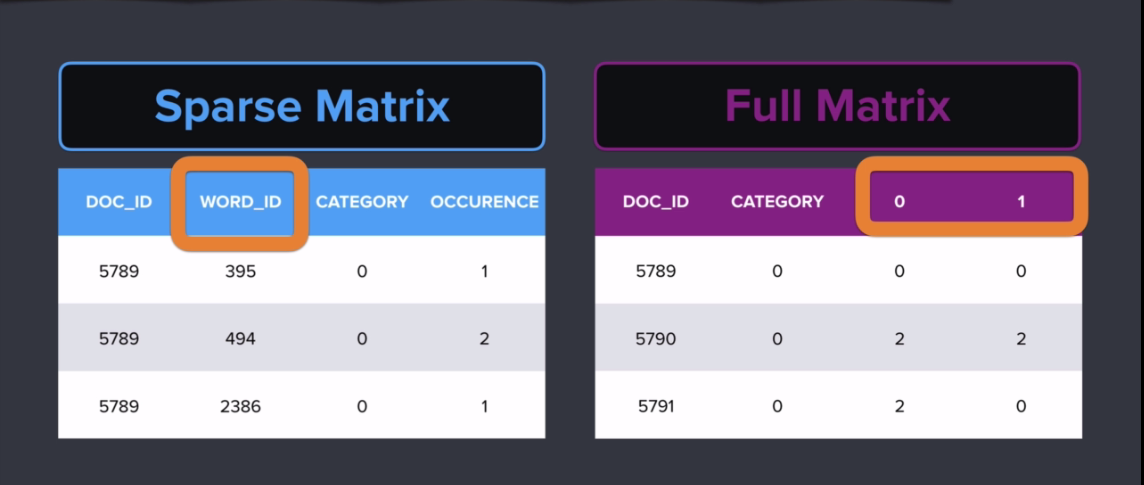

FEEDING DATA

In [9]:
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

In [10]:
full_train_data.tail()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5789,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5790,0,2,2,1,0,0,0,1,0,1,0,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5791,0,2,0,1,1,0,1,2,0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5794,0,2,2,1,0,1,1,1,0,1,0,0,2,2,2,0,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5795,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## TRAINING NAIVE BAYES MODEL

In [27]:
# Calculating the prob of spam
#As Spam is assigned 1 label and ham 0, The sum = 1* no. of spam emails
prob_spam = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size    
print('Probability of Spam email %1.3f'%(prob_spam))

Probability of Spam email 0.311


In [29]:
# Generating the datframe without Category so that we can work with occurences 
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,2,0,0,3,0,0,0,0,3,0,0,0,0,0,4,4,2,0,0,0,2,0,0,0,2,0,2,1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,3,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,2,4,2,3,1,1,1,0,1,1,4,0,1,0,2,0,2,2,4,3,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# The sum of all the colums wrrt DOC_ID, i.em The no of words/tokens in each email
email_lengths = full_train_features.sum(axis=1)

In [31]:
email_lengths.head()

DOC_ID
0     50
1     76
2     87
3     76
4    136
dtype: int64

TOTAL NO OF WORDS

In [34]:
# Getting total no of words
total_wc= email_lengths.sum()

TOTAL NO OF SPAM


In [36]:
spam_lengths = email_lengths[full_train_data.CATEGORY == 1]
spam_wc= spam_lengths.sum()

TOTAL NO OF NONSPAM


In [44]:
nonspam_lengths = email_lengths[full_train_data.CATEGORY == 0]
nonspam_wc= nonspam_lengths.sum()


TOTAL TOKENS OCCURING IN SPAM

In [50]:
# Dataframe of only spam emails
train_spam_tokens = full_train_features.loc[full_train_data.CATEGORY == 1]
train_spam_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,2,0,0,3,0,0,0,0,3,0,0,0,0,0,4,4,2,0,0,0,2,0,0,0,2,0,2,1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,3,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,2,4,2,3,1,1,1,0,1,1,4,0,1,0,2,0,2,2,4,3,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Taking Summation of All the words  in a column(As one column is equal to the word, while it's instances is equal to its occurences in the particular email(row))
#LAPLACE SMOOTHING TECHNIQUE:- 1 is added here so that we don't come across 0/0 error while calulting a probabilty
summed_spam_tokens = train_spam_tokens.sum(axis=0) + 1
summed_spam_tokens

0       1793
1        968
2       1355
3       2099
4       1348
        ... 
2495      19
2496       2
2497      23
2498      10
2499       4
Length: 2500, dtype: int64

TOTAL TOKENS OCCURING IN NONSPAM(HAM)

In [52]:
train_ham_tokens = full_train_features.loc[full_train_data.CATEGORY == 0]
summed_ham_tokens = train_ham_tokens.sum(axis=0) + 1

In [56]:
summed_ham_tokens

0       5273
1       2499
2       2038
3        944
4       1595
        ... 
2495      13
2496      19
2497       1
2498      16
2499      35
Length: 2500, dtype: int64

### P(Token | Spam) - Probability that a Token Occurs given the Email is SPAM




In [58]:
prob_tokens_spam = summed_spam_tokens / (spam_wc + VOCAB_SIZE)
# The VOCAB_SIZE IS TAKEN TO FIX THE +1 we took(LAPLACE SMOOTHING TECHNIQUE)

In [59]:
prob_tokens_spam

0       0.009049
1       0.004885
2       0.006838
3       0.010593
4       0.006803
          ...   
2495    0.000096
2496    0.000010
2497    0.000116
2498    0.000050
2499    0.000020
Length: 2500, dtype: float64

### P(Token | Ham) - Probability that a Token Occurs given the Email is NONSPAM



In [62]:
prob_tokens_nonspam = summed_ham_tokens / (nonspam_wc + VOCAB_SIZE)

In [63]:
prob_tokens_nonspam

0       0.020863
1       0.009887
2       0.008063
3       0.003735
4       0.006311
          ...   
2495    0.000051
2496    0.000075
2497    0.000004
2498    0.000063
2499    0.000138
Length: 2500, dtype: float64

### P(Token) - Probability that Token Occurs 


In [66]:
prob_tokens_all = full_train_features.sum(axis=0) / total_wc
# Since we took only top 2500 words, the probability of 0/0 error is=0

SAVING THE DATA

In [69]:
np.savetxt(TOKEN_SPAM_PROB_FILE, prob_tokens_spam)
np.savetxt(TOKEN_HAM_PROB_FILE, prob_tokens_nonspam)
np.savetxt(TOKEN_ALL_PROB_FILE, prob_tokens_all)

# PREPARING TEST DATA

In [70]:
full_test_data = make_full_matrix(sparse_test_data, nr_words=VOCAB_SIZE)

In [71]:
X_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY


In [73]:
np.savetxt(TEST_TARGET_FILE, y_test)
np.savetxt(TEST_FEATURE_MATRIX, X_test)